In [2]:
import random
import tkinter as tk
import math
import time

In [3]:
# determining the starting player
starting_player="X"

games_mini=0
games_alpha=0
games_blocking=0
games_hueristic=0
games_winning=0
games_symmetry=0

# wins,losses,draws
dict_mini = {"wins":0,"losses":0,"draws":0}
dict_alpha = {"wins":0,"losses":0,"draws":0}
dict_blocking = {"wins":0,"losses":0,"draws":0}
dict_hueristic = {"wins":0,"losses":0,"draws":0}
dict_winning = {"wins":0,"losses":0,"draws":0}
dict_symmetry = {"wins":0,"losses":0,"draws":0}

# for counting nodes
stats_mini=[]
stats_alpha=[]
stats_blocking=[]
stats_hueristic=[]
stats_winning=[]
stats_symmetry=[]

def choose_algorithm():
    algorithm_window = tk.Tk()
    algorithm_window.title("Choose Minimax Algorithm")

    tk.Label(algorithm_window, text="Choose Minimax Algorithm:", width=50, height=2).grid(row=0, column=0, columnspan=2, pady=50)

    buttons_info = [
        ("Minimax", 1,1, 0),
        ("Minimax with Alpha-Beta Pruning", 2,2, 0),
        ("Minimax with blocking", 3, 3,0),
        ("Minimax with winning", 3, 4,1),
        ("Heuristic reduction", 1, 5,1),
        ("Symmetry reduction", 2, 6,1)
    ]

    for text, row, value,column in buttons_info:
        tk.Button(algorithm_window, text=text, font=('normal', 10), width=30, height=2, command=lambda r=value: callclass(r)).grid(row=row, column=column, pady=20, padx=10)

    algorithm_window.mainloop()
    
def callclass(x):  
    game = TicTacToeGUI()
    game.play(x)    

        
class TicTacToeGUI:
    def __init__(self):
        self.window = tk.Tk()
        self.window.title("X O")
        self.choose=0
        self.nodes=0
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        if starting_player!="":
            self.current_player = starting_player
        else:
            self.current_player = "X"

        self.buttons = [[None for _ in range(3)] for _ in range(3)]
        
        for i in range(3):
            for j in range(3):
                self.buttons[i][j] = tk.Button(self.window, text='', font=('normal', 20), width=5, height=2,
                                               command=lambda row=i, col=j: self.make_move(row, col))
                self.buttons[i][j].grid(row=i, column=j)

        # Play Again Button
        play_again_button = tk.Button(self.window, text='Play Again', font=('bold', 12), command=self.reset_game)
        play_again_button.grid(row=3, column=0, columnspan=3)
        
        self.window.after(0, self.on_load)
        

    def on_load(self):
        if self.choose == 5 and self.current_player =="O":
            self.make_move(1,1)
        else:
            random_number1 = random.randint(0, 2)
            random_number2 = random.randint(0, 2)
            if self.current_player=="O":
                self.make_move(random_number1,random_number2)

        
    def add_score(self):
        if self.choose == 1: 
            stats_mini.append(self.nodes)
        elif self.choose==2:
            stats_alpha.append(self.nodes)
        elif self.choose==3:
            stats_blocking.append(self.nodes)
        elif self.choose==4:
            stats_winning.append(self.nodes)
        elif self.choose==5:
            stats_hueristic.append(self.nodes)
        elif self.choose==6:
            stats_symmetry.append(self.nodes)    
        self.nodes=0
        
    def make_move(self, row, col):
        if self.board[row][col] == ' ':
            self.board[row][col] = self.current_player
            self.buttons[row][col].config(text=self.current_player, state=tk.DISABLED)

            if self.is_winner(self.current_player):
                self.show_winner(self.current_player)
            elif self.is_full():
                self.show_draw()
            else:
                self.switch_player()

            if self.current_player == 'O':
                self.make_computer_move()

    def reset_game(self):
        # Reset the game state
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.current_player = starting_player 
        # Reset button texts and states
        for i in range(3):
            for j in range(3):
                self.buttons[i][j].config(text='', state=tk.NORMAL)

        # Remove winner/draw labels
        for widget in self.window.grid_slaves():
            if int(widget.grid_info()["row"]) == 4:
                widget.grid_forget()
        self.on_load()        

    def is_winner(self, player):
        for i in range(3): # rows and columns
            if all(self.board[i][j] == player for j in range(3)) or \
               all(self.board[j][i] == player for j in range(3)):
                return True
        if all(self.board[i][i] == player for i in range(3)) or \
           all(self.board[i][2 - i] == player for i in range(3)):#diag
            return True
        return False

    def is_full(self):
        return all(self.board[i][j] != ' ' for i in range(3) for j in range(3))

    def show_winner(self, player):
        
        if self.choose == 1:
            if player =="O":
                dict_mini["wins"]+=1
            else:
                dict_mini["losses"]+=1
        elif self.choose==2:
            if player =="O":
                dict_alpha["wins"]+=1
            else:
                dict_alpha["losses"]+=1
        elif self.choose==3:
            if player =="O":
                dict_blocking["wins"]+=1
            else:
                dict_blocking["losses"]+=1
        elif self.choose==4:
            if player =="O":
                dict_winning["wins"]+=1
            else:
                dict_winning["losses"]+=1
        elif self.choose==5:
            if player =="O":
                dict_hueristic["wins"]+=1
            else:
                dict_hueristic["losses"]+=1
        elif self.choose==6:
            if player =="O":
                dict_symmetry["wins"]+=1
            else:
                dict_symmetry["losses"]+=1
        
        global games_mini
        global games_alpha
        global games_blocking
        global games_hueristic
        global games_winning
        global games_symmetry
        
        if self.choose == 1: 
            games_mini+=1
        elif self.choose==2:
            games_alpha+=1
        elif self.choose==3:
            games_blocking+=1
        elif self.choose==4:
            games_winning+=1
        elif self.choose==5:
            games_hueristic+=1
        elif self.choose==6:
            games_symmetry+=1          
            
        winner_label = tk.Label(self.window, text=f"Player {player} wins!", font=('bold', 14))
        winner_label.grid(row=4, columnspan=3)
        global starting_player
        starting_player= player
        self.disable_buttons()
        self.add_score()

    def show_draw(self):
        if self.choose == 1:
                dict_mini["draws"]+=1
        elif self.choose==2:
                dict_alpha["draws"]+=1
        elif self.choose==3:
                dict_blocking["draws"]+=1
        elif self.choose==4:
                dict_winning["draws"]+=1
        elif self.choose==5:
                dict_hueristic["draws"]+=1
        elif self.choose==6:
                dict_symmetry["draws"]+=1
         
        global games_mini
        global games_alpha
        global games_blocking
        global games_hueristic
        global games_winning
        global games_symmetry
        
        if self.choose == 1: 
            games_mini+=1
        elif self.choose==2:
            games_alpha+=1
        elif self.choose==3:
            games_blocking+=1
        elif self.choose==4:
            games_winning+=1
        elif self.choose==5:
            games_hueristic+=1
        elif self.choose==6:
            games_symmetry+=1   
        
        global starting_player
        starting_player= 'O' if self.current_player == 'X' else 'X'
        draw_label = tk.Label(self.window, text="It's a draw!", font=('bold', 14))
        draw_label.grid(row=4, columnspan=3)
        self.disable_buttons()
        self.add_score()

    def disable_buttons(self):
        for i in range(3):
            for j in range(3):
                self.buttons[i][j].config(state=tk.DISABLED)

    def switch_player(self):
        self.current_player = 'O' if self.current_player == 'X' else 'X'

    def make_computer_move(self):
        if not self.is_terminal():
            row, col = self.find_best_move()
            self.make_move(row, col)

    def is_terminal(self):
        return self.is_winner('O') or self.is_winner('X') or self.is_full()

    def evaluate(self):
        if self.is_winner('O'):
            return 1
        elif self.is_winner('X'):
            return -1
        else:
            return 0

    def evaluate_winning(self,depth):
        
        if self.is_winner('O'):
            return 10-depth
        elif self.is_winner('X'):
            return depth-10
        else:
            return 0
        
    def evaluate_blocking(self,depth):
        
        if self.is_winner('O'):
            return depth-10
        elif self.is_winner('X'):
            return -100
        elif self.check_blocking("X"):
            return 10-depth
        else:
            return 0   
        
    def check_blocking(self,opponent):
        
            for i in range(3):      
                    if self.board[i].count(opponent) == 2 and self.board[i].count(' ') == 1:
                        return True

            # Check columns
            for j in range(3):
                column = [self.board[i][j] for i in range(3)]
                if column.count(opponent) == 2 and column.count(' ') == 1:
                    
                    return True

            # Check diagonals
            diagonal1 = [self.board[i][i] for i in range(3)]
            diagonal2 = [self.board[i][2 - i] for i in range(3)]
            if diagonal1.count(opponent) == 2 and diagonal1.count(' ') == 1:
                return True
            if diagonal2.count(opponent) == 2 and diagonal2.count(' ') == 1:
                return True

            return False
        
    def check_winning(self,depth,AI):
        
            for i in range(3):         
                    if self.board[i].count("O") == 3 :
                        return True

            # Check columns
            for j in range(3):
                column = [self.board[i][j] for i in range(3)]
                if column.count(AI) == 3 :
                    
                    return True

            # Check diagonals
            diagonal1 = [self.board[i][i] for i in range(3)]
            diagonal2 = [self.board[i][2 - i] for i in range(3)]
            if diagonal1.count(AI) == 3 :
                return True
            if diagonal2.count(AI) == 3 :
                return True

            return False    
        
           
    def minimaxalphabeta(self, depth, alpha, beta, maximizing_player):
        
        if self.is_terminal():
            return self.evaluate()

        if maximizing_player:
            max_eval = -math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'O'
                        eval = self.minimaxalphabeta(depth + 1, alpha, beta, False)
                        self.board[i][j] = ' '
                        max_eval = max(max_eval, eval)
                        alpha = max(alpha, eval)
                        if beta <= alpha:
                            break  # Beta cutoff
                        self.nodes+=1    
            return max_eval
        else:
            min_eval = math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'X'
                        eval = self.minimaxalphabeta(depth + 1, alpha, beta, True)
                        self.board[i][j] = ' '
                        min_eval = min(min_eval, eval)
                        beta = min(beta, eval)
                        if beta <= alpha:
                            break  # Alpha cutoff
                        self.nodes+=1    
            return min_eval
    

    def minimax(self, depth, maximizing_player ):
       
        if self.is_terminal():
            return self.evaluate()
        
        if maximizing_player:
            max_eval = -math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'O'
                        eval = self.minimax(depth + 1, False)
                        self.board[i][j] = ' '
                        max_eval = max(max_eval, eval)
                        self.nodes+=1
            return max_eval
        else:
            min_eval = math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'X'
                        eval = self.minimax(depth + 1, True)
                        self.board[i][j] = ' '
                        min_eval = min(min_eval, eval)
                        self.nodes+=1 
            return min_eval
        
    def minimax_winning(self, depth, maximizing_player ):
        
        if self.is_terminal():
            return self.evaluate_winning(depth)
        
        if maximizing_player:
            max_eval = -math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'O'
                        eval = self.minimax_winning(depth + 1, False)
                        self.board[i][j] = ' '
                        max_eval = max(max_eval, eval)
                        self.nodes+=1
            return max_eval
        else:
            min_eval = math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'X'
                        eval = self.minimax_winning(depth + 1, True)
                        self.board[i][j] = ' '
                        min_eval = min(min_eval, eval)
                        self.nodes+=1 
            return min_eval    
        
    def heuristic_reduction(self, row, col):
        
        expected_wins = 0
        # Check the row
        if (self.board[row].count("O") == 1 and self.board[row].count(' ') == 2) or \
        (self.board[row].count("O") == 2 and self.board[row].count(' ') == 1):
            expected_wins += 1     
        # Check the column
        column = [self.board[i][col] for i in range(3)]   
        if (column.count("O") == 1 and column.count(' ') == 2) or (column.count("O") == 2 and column.count(' ') == 1):
            expected_wins += 1
        # Check the diagonals
        if row == col:
            diagonal1 = [self.board[i][i] for i in range(3)]
            if (diagonal1.count("O") == 1 and diagonal1.count(' ') == 2) or (diagonal1.count("O") == 2 and diagonal1.count(' ') == 1):
                expected_wins += 1
        if row + col == 2:
            diagonal2 = [self.board[i][2 - i] for i in range(3)]
            if (diagonal2.count("O") == 1 and diagonal2.count(' ') == 2) or (diagonal2.count("O") == 2 and diagonal2.count(' ') == 1):
                expected_wins += 1

        return expected_wins
    
    def minimax_symmetry(self, depth, maximizing_player ):
        if self.is_terminal():
            return self.evaluate()
        moves=[]
        moves = self.apply_symmetry_reduction(self.board)
        
        if len(moves)!=0:
            
            if maximizing_player:
                max_eval = -math.inf
                for x in moves:
                    self.board[x[0]][x[1]] = 'O'
                    eval = self.minimax_symmetry(depth + 1, False)
                    self.board[x[0]][x[1]] = ' '
                    max_eval = max(max_eval, eval)
                    self.nodes+=1
                return max_eval 
            else:
                min_eval = math.inf
                for i in range(3):
                    for j in range(3):
                        if self.board[i][j] == ' ':
                            self.board[i][j] = 'X'
                            eval = self.minimax_symmetry(depth + 1, True)
                            self.board[i][j] = ' '
                            min_eval = min(min_eval, eval)
                            self.nodes+=1 
                return min_eval
        else:

            if maximizing_player:
                max_eval = -math.inf
                for i in range(3):
                    for j in range(3):
                        if self.board[i][j] == ' ':
                            self.board[i][j] = 'O'
                            eval = self.minimax_symmetry(depth + 1, False)
                            self.board[i][j] = ' '
                            max_eval = max(max_eval, eval)
                            self.nodes+=1
                return max_eval

            else:
                min_eval = math.inf
                for i in range(3):
                    for j in range(3):
                        if self.board[i][j] == ' ':
                            self.board[i][j] = 'X'
                            eval = self.minimax_symmetry(depth + 1, True)
                            self.board[i][j] = ' '
                            min_eval = min(min_eval, eval)
                            self.nodes+=1 
                return min_eval
    

    def minimax_blocking(self, depth, maximizing_player):
        
        if self.is_terminal():
            return self.evaluate_blocking(depth)
        
        if maximizing_player:
            max_eval = -math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'O'
                        eval = self.minimax_blocking(depth + 1, False)
                        self.board[i][j] = ' '
                        max_eval = max(max_eval, eval)
                        self.nodes+=1
            return max_eval
        else:
            min_eval = math.inf
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'X'
                        eval = self.minimax_blocking(depth + 1, True)
                        self.board[i][j] = ' '
                        min_eval = min(min_eval, eval)
                        self.nodes+=1 
            return min_eval
    
    #@staticmethod
    def apply_symmetry_reduction(self,board):
        # Function to create a new board with symmetry reduction
        # This implementation considers horizontal, vertical, and diagonal symmetries
        flag = 0
        new_board = [row[:] for row in board]
        list_moves = []
        
        flag2=0
        for i in range(3):
            for k in range(3):
                if i==1 and k==1:
                    if board[i][k]!="X":
                        flag2=1
                        break
                else:
                    if board[i][k]!=" ":
                        flag2=1
                        break

        if flag2  == 0:
            moves=[[0,1],[0,0]]
            return moves
        # Check for horizontal symmetry
        if all(new_board[i][0] == new_board[i][2] for i in range(3)):
            # moves in the middle column
            for i in range(3):
                if new_board[i][1] == " " and [i, 1] not in list_moves:
                    list_moves.append([i, 1])

            for i in range(3):
                if [i, 0] not in list_moves and new_board[i][0] == " ":
                    list_moves.append([i, 0])

        # Check for vertical symmetry
        if all(new_board[0][i] == new_board[2][i] for i in range(3)):
            # moves in the middle row
            for i in range(3):
                if new_board[1][i] == " " and [1, i] not in list_moves:
                    list_moves.append([1, i])

            for i in range(3):
                if [0, i] not in list_moves and new_board[0][i] == " ":
                    list_moves.append([0, i])

        # Check for diagonal symmetry
        # diagonal 1
        if new_board[0][0] == new_board[2][2] and new_board[0][1] == new_board[1][2] and new_board[1][0] == new_board[2][1]:
            flag = 1
            for i in range(3):
                if new_board[i][2 - i] == " " and [i, 2 - i] not in list_moves:
                    list_moves.append([i, 2 - i])

            if [0, 0] not in list_moves and new_board[0][0] == " ":
                list_moves.append([0, 0])

            if [0, 1] not in list_moves and new_board[0][1] == " ":
                list_moves.append([0, 1])

            if [2, 1] not in list_moves and new_board[2][1] == " ":
                list_moves.append([2, 1])

        # diagonal 2
        if new_board[0][2] == new_board[2][0] and new_board[0][1] == new_board[1][0] and new_board[1][2] == new_board[2][1]:
            if flag == 0:
                for i in range(3):
                    if new_board[i][i] == " " and [i, i] not in list_moves:
                        list_moves.append([i, i])

                if [0, 2] not in list_moves and new_board[0][2] == " ":
                    list_moves.append([0, 2])
                if [0, 1] not in list_moves and new_board[0][1] == " ":
                    list_moves.append([0, 1])
                if [2, 1] not in list_moves and new_board[2][1] == " ":
                    list_moves.append([2, 1])

        list_moves = set(map(tuple, list_moves))
        list_moves = list(map(list, list_moves))

        return list_moves
        

    def find_best_move(self):
        if self.choose == 6:
            best_val = -math.inf
            best_move = (-1, -1)
            print("find best move is called")
            moves=[]
            moves = self.apply_symmetry_reduction(self.board)
            print(moves)
            if len(moves)!=0:
                for x in moves:
                        self.board[x[0]][x[1]] = 'O'
                        move_val = self.minimax_symmetry(0, False)
                        if move_val > best_val:
                                best_move = (x[0], x[1])
                                best_val = move_val    
                        self.board[x[0]][x[1]] = ' '
            else :           
                for i in range(3):
                    for j in range(3):
                        if self.board[i][j] == ' ':
                            self.board[i][j] = 'O'
                            move_val = self.minimax_symmetry(0, False)
                            if move_val > best_val:
                                best_move = (i, j)
                                best_val = move_val
                            self.board[i][j] = ' '    
            return best_move
        else:                
            best_val = -math.inf
            best_move = (-1, -1)
            mov=- math.inf
            x=0
            y=0
            for i in range(3):
                for j in range(3):
                    if self.board[i][j] == ' ':
                        self.board[i][j] = 'O'
                        self.nodes+=1
                        if self.choose == 1:
                            move_val = self.minimax(0, False)
                        elif self.choose == 2:
                            move_val = self.minimaxalphabeta(0, -math.inf, math.inf, False)
                        elif self.choose == 3:
                            move_val = self.minimax_blocking(0 , False)
                        elif self.choose == 4:
                            move_val = self.minimax_winning(0 , False)    
                        elif self.choose == 5:
                            move_val = self.heuristic_reduction(i,j)                        
                            if i==0 and j==0:
                                mov=move_val
                            if mov<move_val:
                                x=i
                                y=j
                                mov = move_val
                        self.board[i][j] = ' '
                        if move_val > best_val:
                            best_move = (i, j)
                            best_val = move_val

        return best_move

    def play(self,x):
        self.choose=x

if __name__ == "__main__":
    choose_algorithm()
    print(__name__)
        

__main__


In [ ]:
choose_algorithm()

In [164]:
print(stats_mini,stats_alpha,stats_blocking,stats_hueristic,stats_winning,stats_symmetry)

[60806] [] [] [] [] [33849]


In [85]:
if stats_mini == []:
    stats_mini = [0]
if stats_alpha == []:
    stats_alpha = [0]
if stats_blocking == []:
    stats_blocking = [0]
if stats_hueristic == []:
    stats_hueristic = [0]
if stats_winning == []:
    stats_winning = [0]
if stats_symmetry == []:
    stats_symmetry = [0]    

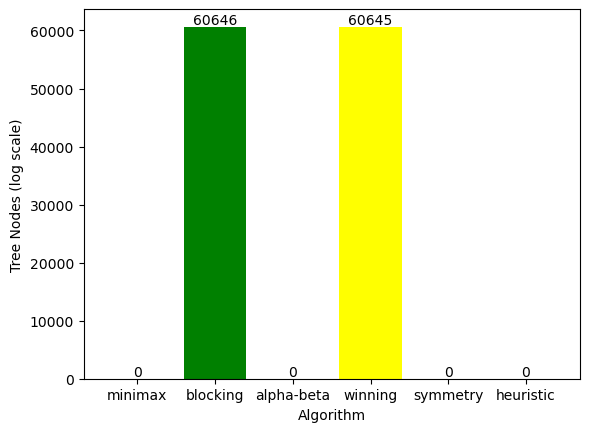

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['minimax', 'blocking', 'alpha-beta', "winning",'symmetry',"heuristic"]
numbers = np.array([np.mean(stats_mini), np.mean(stats_blocking), np.mean(stats_alpha), np.mean(stats_winning), np.mean(stats_symmetry),np.mean(stats_hueristic)])

# Create a bar chart with a logarithmic y-axis
plt.bar(labels, numbers, color=['blue', 'green', 'red', 'yellow',"purple"])
plt.yticks(np.arange(0, max(numbers) + 1, step=10000))
for i, value in enumerate(numbers):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
    
# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Tree Nodes (log scale)')

# Show the plot
plt.show()

In [136]:
print(dict_mini, 
dict_alpha ,
dict_blocking ,
dict_hueristic ,
dict_winning ,
dict_symmetry )

{'wins': 3, 'losses': 0, 'draws': 3} {'wins': 0, 'losses': 0, 'draws': 0} {'wins': 0, 'losses': 0, 'draws': 0} {'wins': 0, 'losses': 0, 'draws': 0} {'wins': 0, 'losses': 0, 'draws': 0} {'wins': 0, 'losses': 0, 'draws': 0}


In [137]:
if games_mini > 0 :
    for i in dict_mini:
        dict_mini[i]=(dict_mini[i]/games_mini)*100

if games_alpha > 0 :        
    for i in dict_alpha:
        dict_alpha[i]=(dict_alpha[i]/games_alpha)*100

if games_blocking > 0 :   
    for i in dict_blocking:
        dict_blocking[i]=(dict_blocking[i]/games_blocking)*100

if games_winning > 0 :
    for i in dict_winning:
        dict_winning[i]=(dict_winning[i]/games_winning)*100
if games_hueristic > 0 : 
    for i in dict_hueristic:
        dict_hueristic[i]=(dict_hueristic[i]/games_hueristic)*100
if games_symmetry > 0 :
    for i in dict_symmetry:
        dict_symmetry[i]=(dict_symmetry[i]/games_symmetry)*100


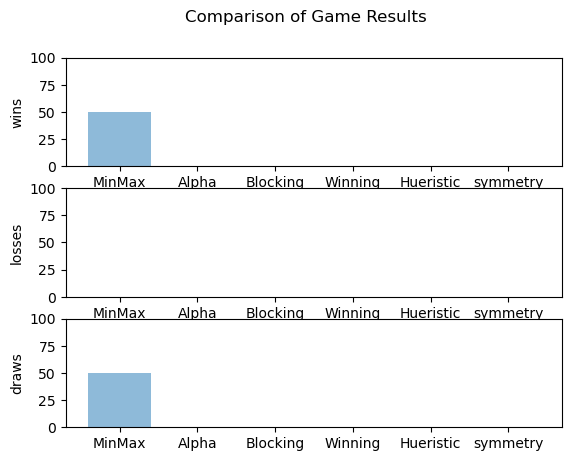

In [138]:
import matplotlib.pyplot as plt


data = [
dict_mini, 
dict_alpha ,
dict_blocking ,
dict_winning ,
dict_symmetry,
dict_hueristic 
]
algo=["MinMax","Alpha","Blocking","Winning","Hueristic","symmetry"]

categories = ['wins', 'losses', 'draws']

for i, category in enumerate(categories):
    plt.subplot(3, 1, i + 1)
    plt.bar(range(len(data)), [entry[category] for entry in data], align='center', alpha=0.5)
    plt.xticks(range(len(data)), ['{}'.format(i) for i in algo ])
    plt.ylabel(category)
    plt.yticks(np.arange(0, 101, step=25))

plt.suptitle('Comparison of Game Results')
plt.show()